In [2]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import folder
import sys
sys.path.append('/content/drive/MyDrive/Springboard/Capstone 2')

In [4]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# the supplied CSV data file is the raw_data directory
stroke_data = pd.read_csv('/content/drive/MyDrive/Springboard/Capstone 2/healthcare-dataset-stroke-data.csv')

In [6]:
#Summary of Data
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#First couple rows of data set
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
#Determining Missing Data
missing = pd.concat([stroke_data.isna().sum(), 100 * stroke_data.isna().mean()],axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count',ascending=False)

,count,%
bmi,201,3.933464
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


In [40]:
na_values = stroke_data[stroke_data['bmi'].isna()]

na_values['stroke'].value_counts()

0    161
1     40
Name: stroke, dtype: int64

In [30]:
# Stroke values
stroke_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [27]:
# Hypertension values
stroke_data['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [28]:
# Heart Disease values
stroke_data['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

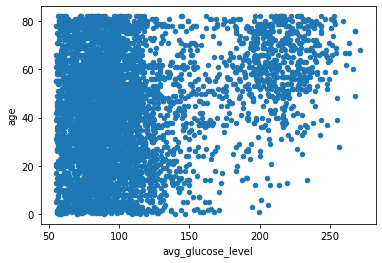

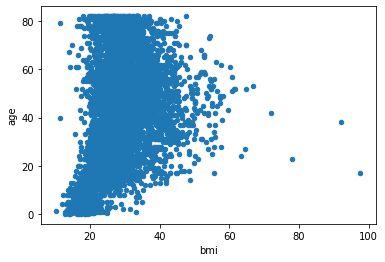

In [41]:
#Scatterplot for avg glucose level vs bmi - All age, bmi, and avg_glucose_level appear to be valid numbers

stroke_data.plot(x='avg_glucose_level', y='age', kind='scatter');
stroke_data.plot(x='bmi', y='age', kind='scatter');

In [42]:
#determined 2 outliers for bmi. As the outliers do not appear to be due to any error in the data, they will not be dropped.
bmi_outliers = stroke_data[stroke_data['bmi'] > 80]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0


In [31]:
#object type columns
stroke_data.select_dtypes(include = 'object')

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [33]:
# Gender values
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [34]:
# married values
stroke_data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [35]:
# work values
stroke_data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [36]:
# residence values
stroke_data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [37]:
# smoking values
stroke_data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Data Wrangling Summary

What kind of cleaning steps did you perform?
- I validated that the datatype of each column is accurate and does not need to be changed.
- I checked whether any columns have NA values and determined that the only column with NA values is bmi, noted that there are 201 missing values. Need to determine if I should drop these values or do something else to fill in the missing values. Further noted that of the 201 missing, values, 40 of them are patients who have had strokes. Noted that there are only a total of 246 rows for patients who have strokes, so dropping 40 of them may result in losing significant data, so I don't want to just drop the data. I will need to figure out how to handle these missing values as I conduct further analysis.
- I checked all the numeric columns in the data to make sure that there are no errors. All the data looks valid.
- I then filtered for all the object type data and checked the values for this data to make sure there are no invalid inputs. Most columns appear to have valid inputs. I noted that there are 1544 Unknown values for 'smoking_status'. As this is a significant number of columns, I cannot drop them. I will need to figure out how to handle these unknown values as I conduct further analysis.

How did you deal with missing values, if there were any?
- I noted 2 missing/unknown values. There were 201 missing bmi numbers, and 1544 unknown smoking numbers. I cannot drop these numbers as the rows contain significant data. As I conduct further analysis, I'll determine the best way to handle these values.

Were there outliers, and how did you handle them?
- There were a couple BMI outliers however as they did not appear to be due to any data errors, I decided to leave them in the data.